https://medium.com/@randerson112358/python-logistic-regression-program-5e1b32f964db

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("C:/Users/hp/python basics/iris-data-master/iris-data-master/data/Iris.csv",header=0)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.set_index("Id", inplace=True)

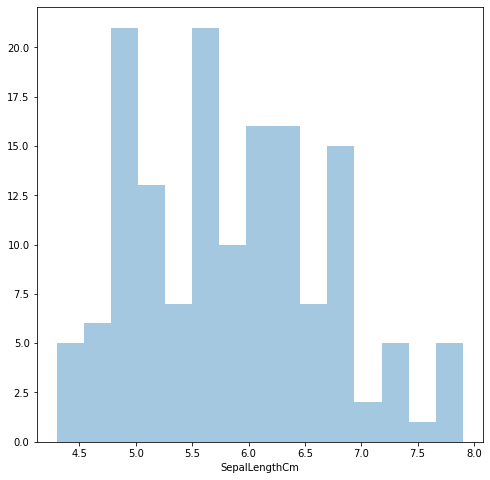

In [5]:
plt.figure(figsize=(8,8))
a=df["SepalLengthCm"]
sns.distplot(a,bins=15,kde=False)

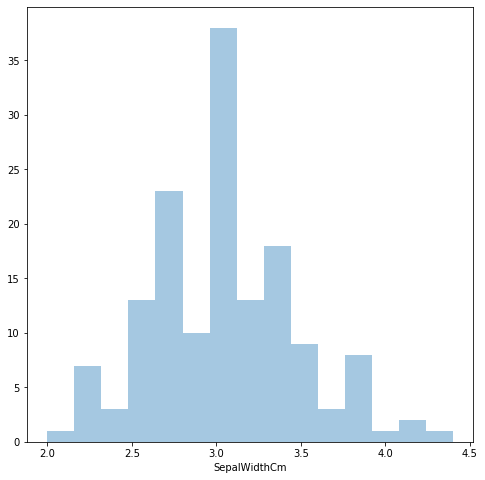

In [6]:
plt.figure(figsize=(8,8))
a=df["SepalWidthCm"]
sns.distplot(a,bins=15,kde=False)

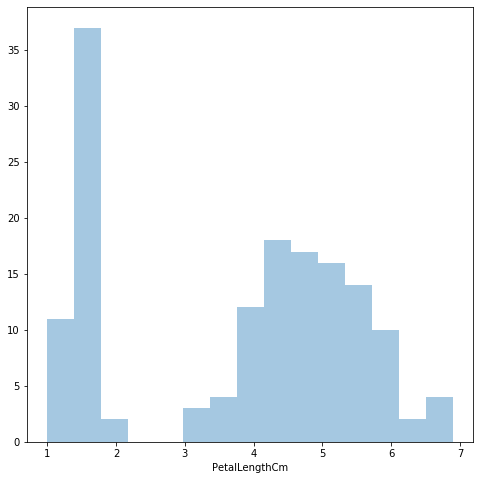

In [7]:
plt.figure(figsize=(8,8))
a=df["PetalLengthCm"]
sns.distplot(a,bins=15,kde=False)

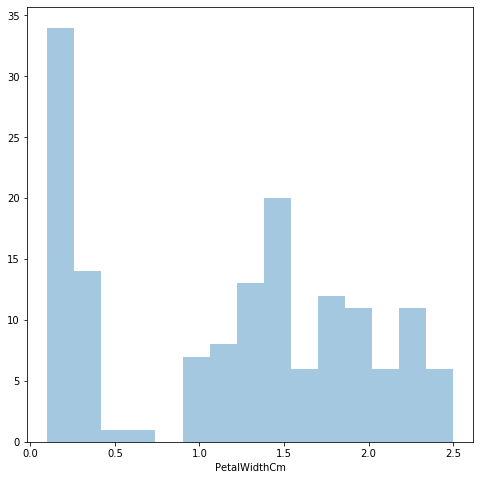

In [8]:
plt.figure(figsize=(8,8))
a=df["PetalWidthCm"]
sns.distplot(a,bins=15,kde=False)

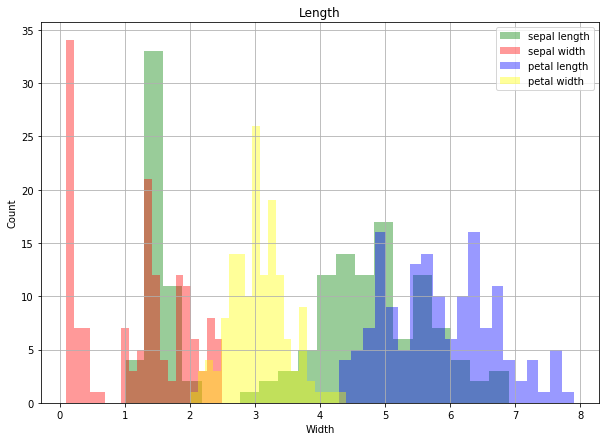

In [9]:
#Now we are combining all the graphs into one single graph
plt.figure(figsize = (10, 7)) 
x = df['PetalLengthCm'] 
y = df['PetalWidthCm']
z = df['SepalLengthCm']
a = df['SepalWidthCm']

#colors=['green','red','blue','yellow']
sns.distplot([x],bins = 20, color = 'green', label = ['sepal length'],kde=False)
sns.distplot([y],bins = 20, color = "red", label = ['sepal width'],kde=False)
sns.distplot([z],bins = 20, color = 'blue', label = ['petal length'],kde=False)
sns.distplot([a],bins = 20, color = "yellow", label = ['petal width'],kde=False)

#Providing legend to identify the column name on basis of their color
plt.legend(loc='upper right')
plt.title("Length") 
plt.xlabel("Width") 
plt.ylabel("Count") 
plt.grid()
plt.show()

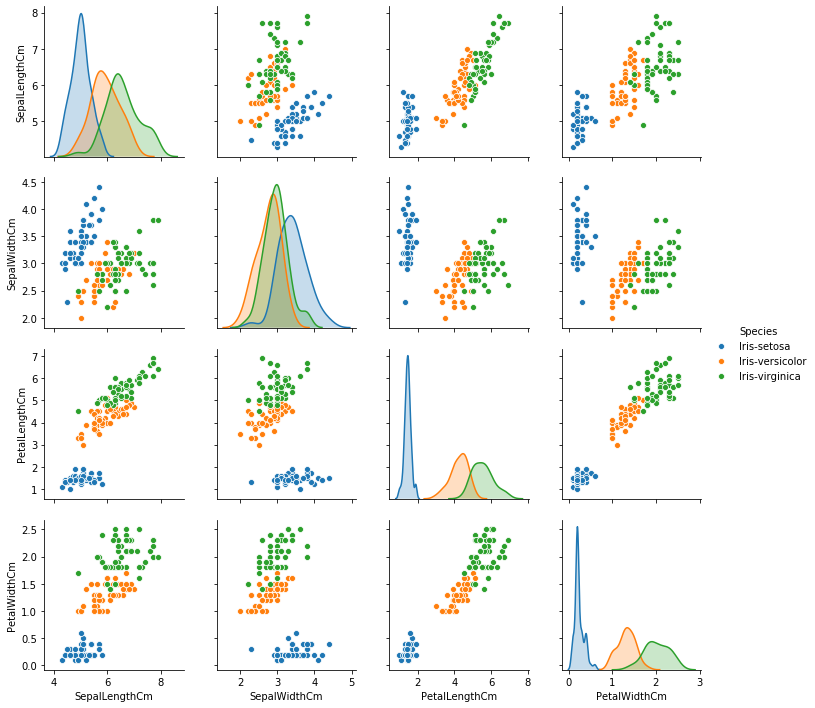

In [10]:
sns.pairplot(df,hue='Species',kind="scatter")

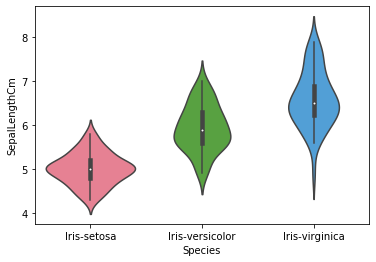

In [11]:
#plt.figure(figsize=(15,10))
sns.violinplot(x=df['Species'],y=df['SepalLengthCm'], palette='husl')


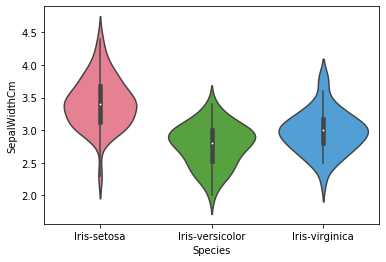

In [12]:
sns.violinplot(x=df['Species'],y=df['SepalWidthCm'], palette='husl')

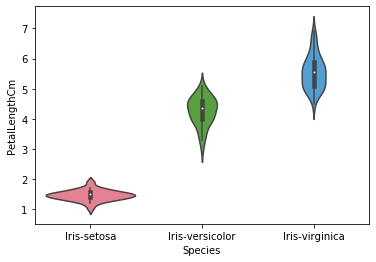

In [13]:

sns.violinplot(x=df['Species'],y=df['PetalLengthCm'], palette='husl')

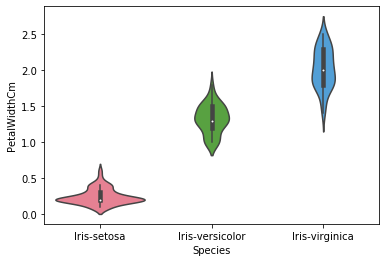

In [14]:

sns.violinplot(x=df['Species'],y=df['PetalWidthCm'], palette='husl')

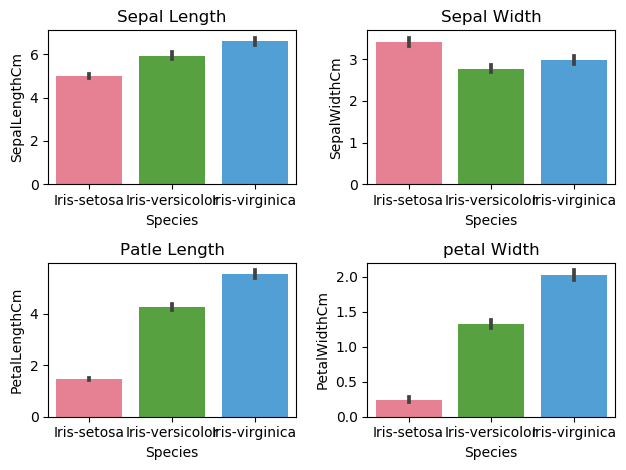

<Figure size 800x800 with 0 Axes>

In [15]:
plt.rcdefaults()
fig,axes=plt.subplots(nrows=2,ncols=2)
plt0,plt1,plt2,plt3 = axes.flatten()

plt0=sns.barplot(x=df['Species'],y=df['SepalLengthCm'], palette='husl',ax=axes[0,0])
plt0.set_title("Sepal Length")

plt1=sns.barplot(x=df['Species'],y=df['SepalWidthCm'], palette='husl',ax=axes[0,1])
plt1.set_title("Sepal Width")

plt2=sns.barplot(x=df['Species'],y=df['PetalLengthCm'], palette='husl',ax=axes[1,0])
plt2.set_title("Patle Length")

plt3=sns.barplot(x=df['Species'],y=df['PetalWidthCm'], palette='husl',ax=axes[1,1])
plt3.set_title("petal Width")

plt.figure(figsize=(8,8))

fig.tight_layout()
plt.show()

#sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
#g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", ci=None);

#sns.FacetGrid(df,col='Species',)


In [16]:
#Applying Polynomial Regression on Any Three Columns of Dataset except target Column Species
"""
df['SepalLengthCm'] = df['SepalLengthCm'].astype(float)
df['SepalWidthCm'] = df['SepalWidthCm'].astype(float)
df['PetalLengthCm'] = df['PetalLengthCm'].astype(float)
df['PetalWidthCm'] = df['PetalWidthCm'].astype(float)
"""


x=df.iloc[:,0:3].values
y=df.iloc[:,3:4].values


from sklearn.linear_model import LinearRegression

lin=LinearRegression()
lin.fit(x,y)
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

#lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lin_preds = lin.predict(x)

print("R^2: ", r2_score(y, lin_preds))


R^2:  0.9380481344518986


## Polynomial Regression

In [17]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
x=df.iloc[:,0:3].values
y=df.iloc[:,3].values

poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(x)

poly.fit(x_poly, y)
lin2 = LinearRegression()
lin2.fit(x_poly,y)

Poly_preds = lin2.predict(x_poly)

print("R^2: ", r2_score(y, Poly_preds))



R^2:  0.9658923692066985


## Logistic Regression



In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
# X = feature values, all the columns except the last column
logisx = df.iloc[:, 1:4].values


#X = data.iloc[:, :3]

# y = target values, last column of the data frame
logisy = df.iloc[:,4].values

In [20]:
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(logisx, logisy, test_size=0.2, random_state=0)

In [21]:
#Train the model
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Prediction and Accuracy check of Logistic Regression

In [22]:
#Test the model for Testing Data
predictions = model.predict(x_test)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_test, predictions) )

print( accuracy_score(y_test, predictions))

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa']

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.85      0.92        13
 Iris-virginica       0.75      1.00      0.86         6

       accuracy                           0.93        30
      macro avg       0.92      0.95      0.92        30
   weighted avg       0.95      0.93      0.94        30

0.9333333333333333


In [23]:
df['Species']=df['Species'].map({'Iris-setosa': 1,'Iris-virginica': 2,'Iris-versicolor': 3})

In [24]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2


In [25]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
x=df.iloc[:,1:4].values
y=df.iloc[:,4].values

poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(x)

poly.fit(x_poly, y)
lin2 = LinearRegression()
lin2.fit(x_poly,y)

Poly_preds = lin2.predict(x_poly)

print("R^2: ", r2_score(y, Poly_preds))

R^2:  0.9755262595325181


In [26]:
#Test the model for Training Data
predictions = model.predict(x_train)
print(predictions)# printing predictions

print()# Printing new line

#Check precision, recall, f1-score
print( classification_report(y_train, predictions) )

print( accuracy_score(y_train, predictions))

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-vir

# K Nearest Neighbors(KNN)

In [27]:
from sklearn.preprocessing import StandardScaler # For scaling the data
from sklearn.model_selection import cross_val_score # For scoring
from sklearn.neighbors import KNeighborsClassifier # For applying KNN classification algorithm
from sklearn.ensemble import RandomForestClassifier # For applying Random Forest algorithm

In [28]:
knn= KNeighborsClassifier(n_neighbors=10 , p=2 ,metric='minkowski')
knn.fit(x_test,y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [29]:
knn.score(x_test,y_test)

0.8666666666666667

In [30]:
knn= KNeighborsClassifier(n_neighbors=10 , p=2 ,metric='minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [31]:
knn.score(x_train,y_train)

0.9583333333333334

## Scaling the Data

In [39]:
sc = StandardScaler()
sc.fit(x_train)
X_train_std = sc.transform(x_train)
X_test_std = sc.transform(x_test)

#X_train_std and X_test_std are the scaled datasets to be used in algorithms

In [40]:
#Now Apply KNN on Scaled Data
knn.fit(X_test_std,y_test)
knn.score(X_test_std,y_test)

0.8

In [41]:
knn.fit(X_train_std,y_train)
knn.score(X_train_std,y_train)

0.9666666666666667

## Random Forest

In [42]:
#Applying Random Forest without Scaling Data
random_Forest = RandomForestClassifier()
random_Forest.fit(x_test,y_test)
random_Forest.score(x_test,y_test)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.0

In [43]:
random_Forest.fit(x_train,y_train)
random_Forest.score(x_train,y_train)

0.9916666666666667

In [44]:
#Applying Random Forest With Scaling Data
random_Forest.fit(X_test_std,y_test)
random_Forest.score(X_test_std,y_test)


1.0

In [46]:

random_Forest.fit(X_train_std,y_train)
random_Forest.score(X_train_std,y_train)

1.0

## Report

In [48]:
print("Linear Regression Accuracy Score :",r2_score(y, lin_preds)*100,"%\n")
print("Polinomial Regression Accuracy Score :",r2_score(y, Poly_preds)*100,"%\n")
print("Logistic Regression Accuracy Score :",accuracy_score(y_test, predictions)*100,"%\n")

print("K Nearest Neighbors Accuracy Score Without Standard Scaling for Training Data :",knn.score(x_train,y_train)*100,"%\n")
print("K Nearest Neighbors Accuracy Score With Standard Scaling for Training Data :",knn.score(X_train_std,y_train)*100,"%\n")

print("K Nearest Neighbors Accuracy Score Without Standard Scaling for Testing Data :",knn.score(x_test,y_test)*100,"%\n")
print("K Nearest Neighbors Accuracy Score With Standard Scaling for Testing Data :",knn.score(X_test_std,y_test)*100,"%\n")

print("Random Forrest Accuracy Score Without Standard Scaling for Training Data :",random_Forest.score(x_train,y_train)*100,"%\n")
print("Random Forrest Accuracy Score With Standard Scaling for Training Data :",random_Forest.score(X_train_std,y_train)*100,"%\n")

print("Random Forrest Accuracy Score Without Standard Scaling for Testing Data :",random_Forest.score(x_test,y_test)*100,"%\n")
print("Random Forrest Accuracy Score With Standard Scaling for Testing Data :",random_Forest.score(X_test_std,y_test)*100,"%\n")

Linear Regression Accuracy Score : -65.00957553005942 %

Polinomial Regression Accuracy Score : 97.55262595325182 %



ValueError: Found input variables with inconsistent numbers of samples: [30, 120]